In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


# Start


## Step 1

In [2]:
import pandas as pd

## nasdaq screener copy

In [74]:
#read nasdaq csv file in the same directory
nasdaq = pd.read_csv('nasdaq_screener_new.csv')
#print first 2 columns and 10 rows
nasdaq.iloc[:10, :2]


,Symbol,Name
0,A,Agilent Technologies Inc. Common Stock
1,AA,Alcoa Corporation Common Stock
2,AAC,Ares Acquisition Corporation Class A Ordinary ...
3,AAIN,Arlington Asset Investment Corp 6.000% Senior ...
4,AAL,American Airlines Group Inc. Common Stock
5,AAN,Aarons Holdings Company Inc. Common Stock
6,AAON,AAON Inc. Common Stock
7,AAP,Advance Auto Parts Inc.
8,AAPL,Apple Inc. Common Stock
9,AAT,American Assets Trust Inc. Common Stock


In [95]:
#make a list of all the symbols of and add "$" before every symbol with no space
dollar_list = nasdaq['Symbol'].tolist()
dollar_list = [ '$' + str(elem) for elem in dollar_list ]
dollar_list[:10]

['$A',
 '$AA',
 '$AAC',
 '$AAIN',
 '$AAL',
 '$AAN',
 '$AAON',
 '$AAP',
 '$AAPL',
 '$AAT']

In [96]:
# a new dataframe with the Symbol column from nasdaq then the symbols list named "dollar_symbol" and then the Name column from nasdaq
symbols = pd.DataFrame(nasdaq['Symbol'])
symbols['Dollar_Symbol'] = dollar_list
symbols['Name'] = nasdaq['Name']
symbols.head()

,Symbol,Dollar_Symbol,Name
0,A,$A,Agilent Technologies Inc. Common Stock
1,AA,$AA,Alcoa Corporation Common Stock
2,AAC,$AAC,Ares Acquisition Corporation Class A Ordinary ...
3,AAIN,$AAIN,Arlington Asset Investment Corp 6.000% Senior ...
4,AAL,$AAL,American Airlines Group Inc. Common Stock


In [212]:
change = 'YOU'
#add a "$" to a specific Symbol column in the symbols df from the change variable matching the Symbols column
symbols.loc[symbols['Symbol'] == change, 'Symbol'] = '$' + change
print(symbols.loc[symbols['Symbol'] == '$'+change])

     Symbol Dollar_Symbol                                    Name
3684   $YOU          $YOU  Clear Secure Inc. Class A Common Stock


In [100]:
#add a "$" to all these instances to the "Symbol" column with a loop
for i in range(len(symbols)):
    if len(symbols['Symbol'][i]) == 1:
        symbols['Symbol'][i] = '$' + symbols['Symbol'][i]
symbols.head()



,Symbol,Dollar_Symbol,Name
0,$A,$A,Agilent Technologies Inc. Common Stock
1,AA,$AA,Alcoa Corporation Common Stock
2,AAC,$AAC,Ares Acquisition Corporation Class A Ordinary ...
3,AAIN,$AAIN,Arlington Asset Investment Corp 6.000% Senior ...
4,AAL,$AAL,American Airlines Group Inc. Common Stock


In [215]:
#write only the first 2 columns without the index to a new csv file named symbols.csv
symbols.to_csv('symbols.csv', index=False)


In [216]:
#read the new csv file
symbols = pd.read_csv('symbols.csv')
symbols.head(10)


,Symbol,Dollar_Symbol,Name
0,$A,$A,Agilent Technologies Inc. Common Stock
1,AA,$AA,Alcoa Corporation Common Stock
2,AAC,$AAC,Ares Acquisition Corporation Class A Ordinary ...
3,AAIN,$AAIN,Arlington Asset Investment Corp 6.000% Senior ...
4,AAL,$AAL,American Airlines Group Inc. Common Stock
5,AAN,$AAN,Aarons Holdings Company Inc. Common Stock
6,AAON,$AAON,AAON Inc. Common Stock
7,AAP,$AAP,Advance Auto Parts Inc.
8,AAPL,$AAPL,Apple Inc. Common Stock
9,AAT,$AAT,American Assets Trust Inc. Common Stock


## Find the number of instances of the tickers in the data collected



import the updated CSV file for further research.

## Step 2


In [219]:
#import symbols from the csv file
symbols = pd.read_csv('symbols.csv')  
symbols.head()


,Symbol,Dollar_Symbol,Name
0,$A,$A,Agilent Technologies Inc. Common Stock
1,AA,$AA,Alcoa Corporation Common Stock
2,AAC,$AAC,Ares Acquisition Corporation Class A Ordinary ...
3,AAIN,$AAIN,Arlington Asset Investment Corp 6.000% Senior ...
4,AAL,$AAL,American Airlines Group Inc. Common Stock


In [253]:
#find the row number of the symbol 'AAPL'
symbols[symbols['Symbol'] == 'CCL']

,Symbol,Dollar_Symbol,Name
632,CCL,$CCL,Carnival Corporation Common Stock


In [221]:
len(symbols)

3718

## Step 3 - get hot data

In [222]:
#import the hot text file to a list
hot = open('hot.txt').read().split('\n')
#count the number of items in the list
len(hot)

4415

## Remove Duplicates - MONDAY _ K LEFT - TIME TO GET SERIOUS

In [ ]:
def remove_duplicates(input_file, output_file):
    try:
        with open(input_file, 'r') as f:
            sentences = f.readlines()

        # Remove duplicates while preserving the order
        unique_sentences = list(dict.fromkeys(sentences))

        with open(output_file, 'w') as f:
            f.writelines(unique_sentences)

        print("Duplicates removed successfully and saved to", output_file)
    except FileNotFoundError:
        print("File not found. Please check the input file path.")
    except Exception as e:
        print("An error occurred:", e)

# File inputs
input_file = 'hot.txt'
output_file = 'clean_hot.txt'

remove_duplicates(input_file, output_file)

## Step 4 - Dictioneries

In [223]:
import re

# Initialize an empty dictionary to store the data
date_data_dict = {}

# Open the 'hot.txt' file for reading
with open('hot.txt', 'r') as file:
    current_date = None
    current_lines = []

    # Read the file line by line
    for line in file:
        # Check if the line matches the date format
        match = re.search(r'[-]+(\d{4}-\d{2}-\d{2})', line)
        if match:
            # Extract the date in the format "YYYY-MM-DD"
            current_date = match.group(0).replace('--', '')

            # Start a new list of lines for the current date
            current_lines = []

            # Store the lines under the current date in the dictionary
            date_data_dict[current_date] = current_lines
        else:
            # If the line is not a date, add it to the current list of lines
            current_lines.append(line.strip())

# Print the date_data_dict to see the results
print(date_data_dict)


{'2023-03-16': ['What Are Your Moves Tomorrow, March 16, 2023', 'Most Anticipated Earnings Releases for the week beginning March 13th, 2023', 'Eggon says “GME go up” after earnings. ⬆️', 'Goldman Sachs: 99% of borrowers have a mortgage rate lower than the current market rate', 'Who would have thought?', 'Live look at banks', 'Warning from the treasury market', 'Credit Suisse shares suspended, banking crisis deepens', "let me introduce you to the infinite Frosty glitch from Wendy - apply for their jobs, and get a free frosty whenever you're not selected.", '#DWAC and Trump Media Being investigated for Money Laundering for Russians', 'Credit Suisse to borrow up to about $54 billion from Swiss National Bank', 'It’s confirmed, Rivian has gone tits up!', 'Swiss National Bank says it will provide Credit Suisse with liquidity if necessary', '"Credit suisse is a great company"', 'Wen bankruptcy?', 'Robinhood Users Say The Trading App Won’t Cash In Their Profitable Bets Against Silicon Valley B

In [226]:
#print the date_data_dict keys
date_data_dict.keys()

dict_keys(['2023-03-16', '2023-03-17', '2023-03-18', '2023-03-20', '2023-03-21', '2023-03-22', '2023-03-23', '2023-03-24', '2023-03-25', '2023-03-27', '2023-04-03', '2023-06-09', '2023-06-18', '2023-06-19', '2023-06-20', '2023-06-21', '2023-06-23', '2023-06-25', '2023-06-30', '2023-07-04', '2023-07-05', '2023-07-07', '2023-07-08', '2023-07-09', '2023-07-10', '2023-07-13', '2023-07-15', '2023-07-16', '2023-07-17', '2023-07-18', '2023-07-19', '2023-07-20', '2023-07-21'])

In [227]:
#copy the list of the first key into a list
hot_1= date_data_dict['2023-07-10']
print(hot_1)

['Daily Discussion Thread for July 10, 2023', 'Most Anticipated Earnings Releases for the week beginning July 10th, 2023', 'This is where all the gains go then.', 'life after rivian bois.', 'Trading Meta calls.', 'WSB regards when they make $10 in profit after losing thousands', 'I gave you $SAVE. My next play is $PENN, and my hedge is $GOOGL.', 'I bring you love', 'No seriously, what in the world is going on here?', 'Remember when I got Margin Called on CVNA? Well…', 'WSB Regards With Their Life Savings', 'RIVN ghey bers still don’t know who they fuckin’ with', 'July 10 - Long term CVNA holdings', 'We all know how priceless motivation can be - do your kids a favor and give them more of it', 'Buying the dip', 'How can I profit from this?', 'Citi downgrades US stocks sees SP 500 back to 4k, time to buy calls instead and go for 5k?', 'Are we permabulling Rivian?', '$MSOS $TLRY $CURLF "Germany Unveils Draft Bill To Legalize Cannabis" - Forbes', 'Tesla is going to 100$ before November', 'Y

## Dict testing

In [13]:
print(date_data_dict['2023-07-20'])

['Daily Discussion Thread for July 20, 2023', 'Most Anticipated Earnings Releases for the week beginning July 17th, 2023', 'Did we learn the difference yet?', 'Trade smart, not hard', '"How low can yah go!! how low can yah go!!" -Me bag holder.', 'The Babylon Bee gets it', 'Netflix You Guys Are Fucking Idiots', 'Musk, Tesla board to return $735M after being sued for overpaying themselves', 'December buys CVNA $182k to $2,500,000', 'Oh TSLA what have you done…', '$TSLA Bulls Screamed GrEeN DaY after I called for $270 into ER.. and look where Tesla Went. Regarded DD wins again', 'I have successfully predicted the next three months:', 'Blast from the AI Past', 'Cava puts', "Tesla may keep cutting prices in 'turbulent times', Musk says", 'Rtx yolo i got out alive and with money', 'If my brokerage account can speak', 'Carvana spins lower after S&P warns debt deal could be tantamount to default', '+$130K gains on Regional Banks. Be greedy when others are fearful!', 'The best investment strat

In [16]:
dates = list(date_data_dict.keys())
print(dates)

['2023-03-16', '2023-03-17', '2023-03-18', '2023-03-20', '2023-03-21', '2023-03-22', '2023-03-23', '2023-03-24', '2023-03-25', '2023-03-27', '2023-04-03', '2023-06-09', '2023-06-18', '2023-06-19', '2023-06-20', '2023-06-21', '2023-06-23', '2023-06-25', '2023-06-30', '2023-07-04', '2023-07-05', '2023-07-07', '2023-07-08', '2023-07-09', '2023-07-10', '2023-07-13', '2023-07-15', '2023-07-16', '2023-07-17', '2023-07-18', '2023-07-19', '2023-07-20', '2023-07-21']


In [88]:
print(dates[1])

2023-03-17


## get specific stock - wrong version (next cell - correct)

In [115]:
# Assuming you have the dictionary with keys as dates and sentences as values
# Example of the dictionary:
# sentences_dict = {
#     "2023-07-29": ["AAPL goes wild", "$APPL is performing well"],
#     "2023-07-30": ["JPOW is doing good", "MSFT is gaining"],
#     ...
# }

# Assuming you have the "symbols" dataframe with "Symbols" and "Name" columns
# Example of the "symbols" dataframe:
# symbols = pd.DataFrame({
#     "Symbols": ["AAPL", "MSFT", ...],
#     "Name": ["Apple Inc.", "Microsoft Corporation", ...]
# })

# Function to find matches using regular expressions
def find_matches(sentence, symbol_list):
    matches = []
    for symbol in symbol_list:
        pattern = r"(?<!\$)\b" + re.escape(str(symbol)) + r"\b(?!\w)"
        if re.search(pattern, sentence):
            matches.append(symbol)
    return matches

# List to store the results
results = []

# Iterate through each date and its sentences in the dictionary
for date, sentences in date_data_dict.items():
    # Iterate through each sentence
    for sentence in sentences:
        # Find matches for each sentence with and without "$" sign
        matches_without_dollar = find_matches(sentence, symbols['Symbol'].tolist())
        matches_with_dollar = find_matches(sentence, symbols['Symbol'].apply(lambda x: '$' + x).tolist())
        all_matches = matches_without_dollar + matches_with_dollar
        
        # Append the results to the list
        results.append((date, sentence, all_matches))

# Create a new DataFrame to store the results
matches_df = pd.DataFrame(results, columns=["date", "Sentences", "matches"])

# Print the result DataFrame
print(matches_df)


            date                                          Sentences matches
0     2023-03-16       What Are Your Moves Tomorrow, March 16, 2023      []
1     2023-03-16  Most Anticipated Earnings Releases for the wee...      []
2     2023-03-16          Eggon says “GME go up” after earnings. ⬆️   [GME]
3     2023-03-16  Goldman Sachs: 99% of borrowers have a mortgag...      []
4     2023-03-16                            Who would have thought?      []
...          ...                                                ...     ...
3626  2023-07-21                             Am I doing this right?      []
3627  2023-07-21        The exact state of your $TSLA calls 9:30AM.      []
3628  2023-07-21        What Are Your Moves Tomorrow, July 20, 2023      []
3629  2023-07-21                              Tomorrow It Begins...      []
3630  2023-07-21  First Ever Honest Federal Reserve Meeting - Me...      []

[3631 rows x 3 columns]


## correct

In [234]:
import re
import pandas as pd

# Assuming you have the dictionary with keys as dates and sentences as values
# Assuming you have the "symbols" dataframe with "Symbol", "Dollar_Symbol", and "Name" columns

# Function to find matches using regular expressions
def find_matches(sentence, symbol_list):
    matches = []
    for symbol in symbol_list:
        if pd.notna(symbol):  # Skip NaN values in the symbol_list
            pattern = r"\b" + re.escape(str(symbol)) + r"\b"
            if re.search(pattern, sentence):
                matches.append(symbol)
    return matches

# List to store the results
results = []

# Iterate through each date and its sentences in the dictionary
for date, sentences in date_data_dict.items():
    # Iterate through each sentence
    for sentence in sentences:
        # Find matches for each sentence with "Symbol" and "Dollar_Symbol" columns
        matches_symbols = find_matches(sentence, symbols['Symbol'].tolist())
        matches_dollar_symbols = find_matches(sentence, symbols['Dollar_Symbol'].tolist())
        all_matches = matches_symbols + matches_dollar_symbols
        #if all_matches is empty then save then input "S&P"
        if not all_matches:
            all_matches = ['S&P']
        
        # Append the results to the list
        results.append((date, sentence, all_matches))

# Create a new DataFrame to store the results
tickers = pd.DataFrame(results, columns=["date", "Sentences", "matches"])

# Print the result DataFrame
print(tickers)


            date                                          Sentences matches
0     2023-03-16       What Are Your Moves Tomorrow, March 16, 2023   [S&P]
1     2023-03-16  Most Anticipated Earnings Releases for the wee...   [S&P]
2     2023-03-16          Eggon says “GME go up” after earnings. ⬆️   [GME]
3     2023-03-16  Goldman Sachs: 99% of borrowers have a mortgag...   [S&P]
4     2023-03-16                            Who would have thought?   [S&P]
...          ...                                                ...     ...
3626  2023-07-21                             Am I doing this right?   [S&P]
3627  2023-07-21        The exact state of your $TSLA calls 9:30AM.  [TSLA]
3628  2023-07-21        What Are Your Moves Tomorrow, July 20, 2023   [S&P]
3629  2023-07-21                              Tomorrow It Begins...   [S&P]
3630  2023-07-21  First Ever Honest Federal Reserve Meeting - Me...   [S&P]

[3631 rows x 3 columns]


In [235]:
#print all the matches which has more than one match from tickers
tickers[tickers['matches'].apply(lambda x: len(x) > 1)]




,date,Sentences,matches
111,2023-03-17,AI CEO ON GPT-4: THIS CAN GET “SUPER-DANGEROUS...,"[CAN, ON]"
316,2023-03-20,"$25.7K YOLO on AMD NVDA, my gf is out with Pow...","[AMD, NVDA]"
505,2023-03-22,Eggcellent DD - Cal-Maine Foods ($CALM).,"[CALM, DD]"
626,2023-03-22,Eggcellent DD - Cal-Maine Foods ($CALM).,"[CALM, DD]"
682,2023-03-23,SEC is Suing COIN(GME) Gamestop earnings. Let'...,"[COIN, GME]"
...,...,...,...
3479,2023-07-20,$TSLA $300 -> $270 MINIMUM.. Cybertruck Produc...,"[COOK, TSLA]"
3491,2023-07-20,So with both ASML and TSM(C) earnings/calls co...,"[ASML, TSM]"
3561,2023-07-21,$TSLA Bulls Screamed GrEeN DaY after I called ...,"[DD, TSLA]"
3603,2023-07-21,Massive Box Office Weekend Incoming $AMC $WBD ...,"[AMC, WBD]"


In [236]:
#save the tickers dataframe into a csv file
tickers.to_csv('tickers.csv', index=False)
#read the tickers csv
tickers = pd.read_csv('tickers.csv')


In [316]:
# Group by "date" and aggregate unique matches as a list
daily_ticker = tickers.groupby('date')['matches'].agg(lambda x: list(set(y for z in x for y in z))).reset_index()

# Print the result DataFrame
print(daily_ticker)





          date                                            matches
0   2023-03-16                    [DWAC, NVDA, BAC, ES, GME, S&P]
1   2023-03-17                                     [S&P, CAN, ON]
2   2023-03-18           [PTVE, S&P, ALL, ST, DD, NVDA, ZIM, UBS]
3   2023-03-20               [PACW, NVDA, AMD, S&P, DB, UBS, NOW]
4   2023-03-21  [NVDA, NKE, ALL, ES, ARE, DD, S&P, TXN, UBS, NOW]
5   2023-03-22  [NVDA, AMD, ES, COIN, TLRY, GME, DD, S&P, CALM...
6   2023-03-23  [NVDA, AMD, ES, DV, GME, TLRY, S&P, TSLA, COIN...
7   2023-03-24        [NVDA, BKNG, SNAP, DTE, ES, META, S&P, COF]
8   2023-03-25  [ETN, NVDA, SNAP, SOFI, SCHW, MSFT, ES, META, ...
9   2023-03-27  [OUT, AVAV, MSFT, ATVI, TTWO, CCL, ON, BY, DD,...
10  2023-04-03  [NVDA, SCHW, RSI, GO, FDS, AMC, KC, WWE, MPW, ...
11  2023-06-09  [AC, SPCE, BMBL, RH, S&P, TSLA, AAP, AR, NFLX,...
12  2023-06-18  [CVNA, NVDA, AMD, INTC, S&P, SPCE, PYPL, BABA,...
13  2023-06-19  [AMD, SPCE, AM, PYPL, BABA, BUD, S&P, TSLA, PL...
14  2023-0

In [308]:
#daily ticker to csv
daily_ticker.to_csv('daily_ticker.csv', index=False)

In [270]:
#count the unique matches and rank them in descending order 
ticker_rank = daily_ticker['matches'].explode().value_counts().sort_values(ascending=False)

# print the first match name and match count
print(ticker_rank.head(20))

matches
S&P     33
NVDA    27
TSLA    22
DD      18
CVNA    13
AMD     12
META    11
MSFT    10
AAPL    10
PYPL     9
RIVN     9
CCL      9
UBS      7
ATVI     7
ES       7
SPCE     7
COIN     7
UPS      7
TROW     6
BABA     6
Name: count, dtype: int64


# Stocks

## Installs

In [4]:
pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/c8/97/20c8095d492859010867bdad1c92637e62e5b9308c5e45f0caac56e12e42/yfinance-0.2.24-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pandas>=1.3.0 from https://files.pythonhosted.org/packages/8f/bb/aea1fbeed5b474cb8634364718abe9030d7cc7a30bf51f40bd494bbc89a2/pandas-2.0.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for numpy>=1.16.5 from https://files.pythonhosted.org/packages/48/73/df07644e8fa1127a7985db70cf1d07123004e2dd7a3cf33e8b83297a775b/numpy-1.25.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for requests>=2.26 from https://files.pythonhosted.org/packages/70/8e/0e2d847013cb52cd35b38c009bb167a1a26b2ce6cd6965bf26b47bc0bf44/requests-2.31.0-py3-none-any.whl.metadata
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Obtaining dependency information for lxml>=4.9.1 from https://files.pythonhosted.

In [48]:
pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/f6/22/9c31044ff7339c63727a135872e5cb59564f11625372a81c3eebf148f4af/matplotlib-3.7.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/88/e3/696e96ee197b1f60242d12b215332af9fc1961c81990c8b5630b89b34ce6/contourpy-1.1.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/e3/a6/5e8c6dfd239fe281b1aa9408a7d681e82182295fb87d05e086e1e2fd376c/fonttools-4.41.0-cp311-cp311-macosx_10_9_universal2.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 2.9 MB/s eta 0:00:00a 0:00:01
  Using cached kiwisolver-1.4.4-cp311-cp311-macosx_11_0_arm64.whl (63 kB)
  Obtaining dependency information for pillow>=6.2.0 from https://files.pythonhosted.org/packages/

## Step 5 - stock printing 

In [9]:
import yfinance as yf
import matplotlib.pyplot as plt


<Axes: title={'center': "NVDA's stock price"}, xlabel='Date'>

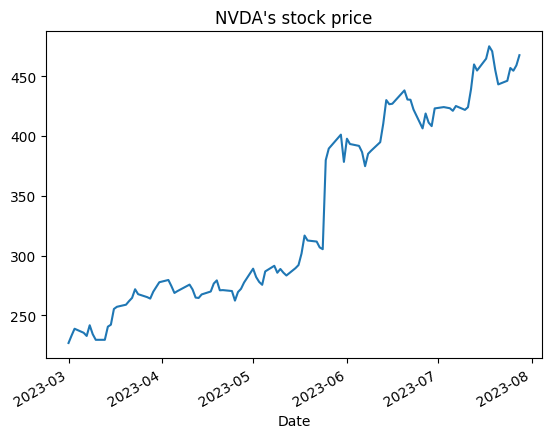

In [10]:
#get stock data on NVDA for the months of march 2023 to july 2023
nvda = yf.download('NVDA', start='2023-03-01', end='2023-07-31', progress=False)

nvda.head()

#plot the closing price of NVDA
nvda['Close'].plot(title="NVDA's stock price")



<Axes: title={'center': "AAPL's stock price"}, xlabel='Date'>

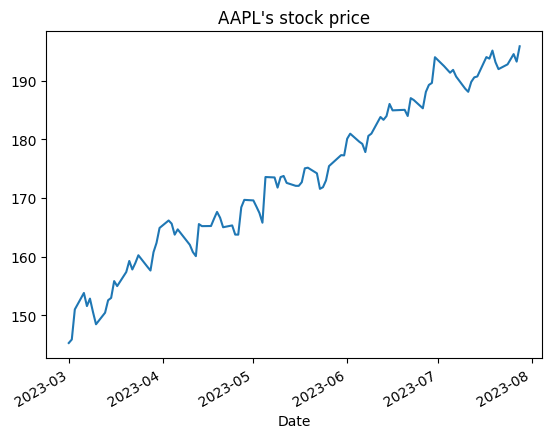

In [11]:
#get stock data on NVDA for the months of march 2023 to july 2023
aapl = yf.download('AAPL', start='2023-03-01', end='2023-07-31', progress=False)

aapl.head()

#plot the closing price of NVDA
aapl['Close'].plot(title="AAPL's stock price")


In [61]:
#get the price of S&P500 from yfinance  
sp500 = yf.download('^GSPC', start='2023-03-16', end='2023-03-18', progress=False)
sp500['Close']


Date
2023-03-16    3960.280029
2023-03-17    3916.639893
Name: Close, dtype: float64

## Previous dates and next dates 
Working, but need to get the price of the next date


In [22]:
import yfinance as yf
from datetime import datetime, timedelta

def download_stock_data(sym, date):
    # Convert the input date string to a datetime object
    input_date = datetime.strptime(date, "%Y-%m-%d")
    
    # Calculate the date 5 days ahead using timedelta
    day_5 = input_date + timedelta(days=5)
    day_5_str = day_5.strftime("%Y-%m-%d")
    
    # Fetch stock data using yfinance.download for the specified symbol and date range
    data = yf.download(sym, start=date, end=day_5_str)
    
    return data

# Example usage:
symbol = "AAPL"
start_date = "2023-03-16"
stock_data = download_stock_data(symbol, start_date)
print(stock_data)


[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-03-16  152.160004  156.460007  151.639999  155.850006  155.634735   
2023-03-17  156.080002  156.740005  154.279999  155.000000  154.785904   
2023-03-20  155.070007  157.820007  154.149994  157.399994  157.182587   

              Volume  
Date                  
2023-03-16  76161100  
2023-03-17  98944600  
2023-03-20  73641400  


# Price history - Wrong



In [151]:
import yfinance as yf
import pandas as pd


def download_stock_data(date, ticker):
    # Calculate the start and end dates for data download
    start_date = date - pd.Timedelta(days=5)
    end_date = date + pd.Timedelta(days=2)

    if start_date.weekday() == 5:  # Saturday
        start_date -= pd.Timedelta(days=1)  # Adjust to previous Friday
    elif start_date.weekday() == 6:  # Sunday
        start_date -= pd.Timedelta(days=2)  # Adjust to previous Friday

    if end_date.weekday() == 5:  # Saturday
        end_date += pd.Timedelta(days=3)  # Adjust to next Monday
    elif end_date.weekday() == 6:  # Sunday
        end_date += pd.Timedelta(days=2)  # Adjust to next Monday

    print("Start Date: ", start_date)
    print("End Date: ", end_date)
    # Download stock data from Yahoo Finance
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    print(stock_data)
    print("Length: ",len(stock_data))

    # Extract closing prices for each day
    closing_prices = stock_data['Close'].tolist()

    return closing_prices

# Example usage:
date_input = pd.to_datetime('2023-07-16')  # Replace this with your desired date
ticker_input = 'AAPL'  # Replace this with your desired stock ticker

# Call the download_stock_data function to get adjusted closing prices
closing_prices = download_stock_data(date_input, ticker_input)

print("Adjusted Closing Prices:", closing_prices)


Start Date:  2023-07-11 00:00:00
End Date:  2023-07-18 00:00:00
[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-07-11  189.160004  189.300003  186.600006  188.080002  188.080002   
2023-07-12  189.679993  191.699997  188.470001  189.770004  189.770004   
2023-07-13  190.500000  191.190002  189.779999  190.539993  190.539993   
2023-07-14  190.229996  191.179993  189.630005  190.690002  190.690002   
2023-07-17  191.899994  194.320007  191.809998  193.990005  193.990005   

              Volume  
Date                  
2023-07-11  46638100  
2023-07-12  60750200  
2023-07-13  41342300  
2023-07-14  41573900  
2023-07-17  50520200  
Length:  5
Adjusted Closing Prices: [188.0800018310547, 189.77000427246094, 190.5399932861328, 190.69000244140625, 193.99000549316406]


# Price history - correct

In [166]:
start_date = pd.to_datetime('2023-03-16')
end_date = pd.to_datetime('2023-08-02')
#ticker for S&P 500 from yfinance
ticker = 'TSLA'

stock_data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [262]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-16,180.369995,185.809998,178.839996,184.130005,184.130005,121136800
2023-03-17,184.520004,186.220001,177.330002,180.130005,180.130005,133197100
2023-03-20,178.080002,186.440002,176.350006,183.250000,183.250000,129684400
2023-03-21,188.279999,198.000000,188.039993,197.580002,197.580002,153391400
2023-03-22,199.300003,200.660004,190.949997,191.149994,191.149994,150376400


In [167]:
#write the stock data to a csv file in the price_data folder
stock_data.to_csv('price_data/TSLA.csv')

## Multiple stock download

In [274]:
def download_stock_data(ticker):
    start_date = pd.to_datetime('2022-08-02')
    end_date = pd.to_datetime('2023-08-02')
    #download the stock
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

In [326]:
#download the S&P stock from the download_stock_data
sp = download_stock_data('UBS')
#write the rivn to a csv file RIVN.csv
sp.to_csv('price_data/UBS.csv')

[*********************100%***********************]  1 of 1 completed


In [277]:
# go through the first 10 index in ticker rank and download the stock price
for i in range(11):
    ticker = ticker_rank.index[i]
    print(ticker)
    # Call the download_stock_data function to get adjusted closing prices
    stock_data = download_stock_data(ticker)
    #write the stock data to a csv file in the price_data folder
    stock_data.to_csv('price_data/'+ticker+'.csv')


S&P
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['S&P']: Exception('%ticker%: No timezone found, symbol may be delisted')



NVDA
[*********************100%***********************]  1 of 1 completed
TSLA
[*********************100%***********************]  1 of 1 completed
DD
[*********************100%***********************]  1 of 1 completed
CVNA
[*********************100%***********************]  1 of 1 completed
AMD
[*********************100%***********************]  1 of 1 completed
META
[*********************100%***********************]  1 of 1 completed
MSFT
[*********************100%***********************]  1 of 1 completed
AAPL
[*********************100%***********************]  1 of 1 completed
PYPL
[*********************100%***********************]  1 of 1 completed
RIVN
[*********************100%***********************]  1 of 1 completed


In [341]:
price_history = pd.DataFrame({
    'Date': [],
    'Ticker': [],
    'T_5': [],
    'T_4': [],
    'T_3': [],
    'T_2': [],
    'T_1': [],
    'Price': [],
    'P_1': [],
})

In [276]:
for i in range(10):
    ticker = ticker_rank.index[i]
    print(ticker)
    

S&P
NVDA
TSLA
DD
CVNA
AMD
META
MSFT
AAPL
PYPL


In [327]:
#read the NVDA.csv file to the NVDA variable
NVDA = pd.read_csv('price_data/NVDA.csv')
#read the TSLA.csv file to the TSLA variable
TSLA = pd.read_csv('price_data/TSLA.csv')
#read the AAPL.csv file to the AAPL variable
AAPL = pd.read_csv('price_data/AAPL.csv')
#read the MSFT.csv file to the MSFT variable
MSFT = pd.read_csv('price_data/MSFT.csv')
#read the PYPL.csv file to the PYPL variable
PYPL = pd.read_csv('price_data/PYPL.csv')
#read the DD.csv file to the DD variable
DD = pd.read_csv('price_data/DD.csv')
#read the META.csv file to the META variable
META = pd.read_csv('price_data/META.csv')
#read the AMD.csv file to the AMD variable
AMD = pd.read_csv('price_data/AMD.csv')
#read the UBS.csv file to the UBS variable
UBS = pd.read_csv('price_data/UBS.csv')
#read the S_P.csv file to the S_P variable
S_P = pd.read_csv('price_data/S_P.csv')
#read the RIVN.csv to the RIVN variable
RIVN = pd.read_csv('price_data/RIVN.csv')
#read the CVNA.csv to the CVNA variable
CVNA = pd.read_csv('price_data/CVNA.csv')



In [268]:
UBS.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-03-16,18.370001,19.260000,18.219999,19.260000,18.767302,8110300
1,2023-03-17,18.400000,18.540001,18.129999,18.200001,17.734419,6349500
2,2023-03-20,19.070000,19.760000,18.610001,18.799999,18.319069,40634500
3,2023-03-21,20.120001,21.270000,19.969999,21.049999,20.511511,18615300
4,2023-03-22,20.440001,20.730000,20.120001,20.400000,19.878139,14634400


## Price history update


In [188]:
date = '2023-07-31'
ticker = 'NVDA'

# Get the index of the date in stock_read DataFrame
date_index = stock_read[stock_read['Date'] == date].index[0]
print(date_index)
# Get the closing prices of 5 previous rows and one row ahead
closing_prices = stock_read.loc[date_index - 5: date_index + 1, 'Close'].tolist()

# Create a DataFrame with the price history data
new_row = {
    'Date': [date],
    'Ticker': [ticker],
    'T_5': [closing_prices[0]],
    'T_4': [closing_prices[1]],
    'T_3': [closing_prices[2]],
    'T_2': [closing_prices[3]],
    'T_1': [closing_prices[4]],
    'Price': [closing_prices[5]],
    'P_1': [closing_prices[6]],
}
new_row = pd.DataFrame(price_history_data)

# Concatenate the new_row with the existing price_history DataFrame
price_history = pd.concat([price_history, new_row], ignore_index=True)

print(price_history)

93
                  Date Ticker         T_5         T_4         T_3         T_2  \
0  2023-07-31 00:00:00   TSLA  165.080002  162.550003  160.669998  153.750000   
1  2023-07-31 00:00:00   TSLA  165.080002  162.550003  160.669998  153.750000   
2           2023-07-31   TSLA  165.080002  162.550003  160.669998  153.750000   
3           2023-07-31   NVDA  271.190002  270.420013  262.410004  269.559998   
4           2023-07-31   NVDA  446.119995  456.790009  454.519989  459.000000   

          T_1       Price         P_1  
0  160.190002  164.309998  161.830002  
1  160.190002  164.309998  161.830002  
2  160.190002  164.309998  161.830002  
3  272.260010  277.489990  289.100006  
4  467.500000  467.290009  465.070007  


## Function - Price History


In [331]:
import pandas as pd

def create_new_row(date, ticker, price_history):

    if ticker == 'NVDA':
        stock_read = NVDA
    elif ticker == 'TSLA':
        stock_read = TSLA
    elif ticker == 'AAPL':
        stock_read = AAPL
    elif ticker == 'MSFT':
        stock_read = MSFT
    elif ticker == 'PYPL':
        stock_read = PYPL
    elif ticker == 'DD':
        stock_read = DD
    elif ticker == 'META':
        stock_read = META
    elif ticker == 'AMD':
        stock_read = AMD
    elif ticker == 'UBS':
        stock_read = UBS
    elif ticker == 'S&P':
        stock_read = S_P
    elif ticker == 'RIVN':
        stock_read = RIVN
    elif ticker == 'CVNA':
        stock_read = CVNA
    else:
        print('Ticker not in top 10, should use S&P')
        stock_read = S_P
        ticker = 'S&P'
    # Get the index of the date in stock_read DataFrame
    date_index = stock_read[stock_read['Date'] == date].index[0]
    
    # Get the closing prices of 5 previous rows and one row ahead
    closing_prices = stock_read.loc[date_index - 5: date_index + 1, 'Close'].tolist()

    # Create a DataFrame with the price history data
    new_row = {
        'Date': [date],
        'Ticker': [ticker],
        'T_5': [closing_prices[0]],
        'T_4': [closing_prices[1]],
        'T_3': [closing_prices[2]],
        'T_2': [closing_prices[3]],
        'T_1': [closing_prices[4]],
        'Price': [closing_prices[5]],
        'P_1': [closing_prices[6]],
    }
    new_row_df = pd.DataFrame(new_row)

    # Concatenate the new_row with the existing price_history DataFrame
    updated_price_history = pd.concat([price_history, new_row_df], ignore_index=True)
    
    return updated_price_history


In [340]:
def check_holiday(date):
    date = pd.to_datetime(date)
    if date.weekday() == 5:  # Saturday
        date -= pd.Timedelta(days=1)  # Adjust to previous Friday
    elif date.weekday() == 6:  # Sunday
        date -= pd.Timedelta(days=2)  # Adjust to previous Friday
    #Juneteenth (Monday)
    elif date == pd.to_datetime('2023-06-19'): 
        date -= pd.Timedelta(days=3)
    #Independce Day (Tuesday)
    elif date == pd.to_datetime('2023-07-04'):
        date -= pd.Timedelta(days=1)
    #convert date back to string
    date = date.strftime("%Y-%m-%d")

    return date



In [342]:
for index, row in daily_ticker.iterrows():
    # Extract the date
    date = row['date']
    # Extract the matches and convert the string representation to a set
    matches = row['matches']
    
    # Print the date and ticker for each match
    for ticker in matches:
        # Check if the date is a holiday
        date = check_holiday(date)
        # Call the function to get the updated price_history DataFrame
        price_history = create_new_row(date, ticker, price_history)

    # Now you have the updated price_history DataFrame
    print(price_history)

Ticker not in top 10, should use S&P
Ticker not in top 10, should use S&P
Ticker not in top 10, should use S&P
Ticker not in top 10, should use S&P
         Date Ticker          T_5          T_4          T_3          T_2  \
0  2023-03-16    S&P  3918.320068  3861.590088  3855.760010  3919.290039   
1  2023-03-16   NVDA   234.360001   229.649994   229.660004   240.630005   
2  2023-03-16    S&P  3918.320068  3861.590088  3855.760010  3919.290039   
3  2023-03-16    S&P  3918.320068  3861.590088  3855.760010  3919.290039   
4  2023-03-16    S&P  3918.320068  3861.590088  3855.760010  3919.290039   
5  2023-03-16    S&P  3918.320068  3861.590088  3855.760010  3919.290039   

           T_1        Price          P_1  
0  3891.929932  3960.280029  3916.639893  
1   242.279999   255.410004   257.250000  
2  3891.929932  3960.280029  3916.639893  
3  3891.929932  3960.280029  3916.639893  
4  3891.929932  3960.280029  3916.639893  
5  3891.929932  3960.280029  3916.639893  
Ticker not in top 

In [339]:
#write price_history to csv
price_history.to_csv('price_history.csv', index=False)


In [306]:
# Inputs

for day in daily_ticker['date']:
        for ticker in daily_ticker['matches']:
                date = pd.to_datetime(day)
                if date.weekday() == 5:  # Saturday
                        date -= pd.Timedelta(days=1)  # Adjust to previous Friday
                elif date.weekday() == 6:  # Sunday
                        date -= pd.Timedelta(days=2)  # Adjust to previous Friday
                #convert date back to string
                date = date.strftime("%Y-%m-%d")
                # Call the function to get the updated price_history DataFrame
                price_history = create_new_row(date, ticker, price_history)

                # Now you have the updated price_history DataFrame
                print(price_history)



Ticker not in top 10, should use S&P
                  Date                           Ticker          T_5  \
0  2023-07-31 00:00:00                             TSLA   165.080002   
1  2023-07-31 00:00:00                             TSLA   165.080002   
2           2023-07-31                             TSLA   165.080002   
3           2023-07-31                             NVDA   271.190002   
4           2023-07-31                             NVDA   446.119995   
5           2023-07-07                             NVDA   408.220001   
6           2023-03-16  {DWAC, NVDA, BAC, ES, GME, S&P}  3918.320068   

           T_4          T_3          T_2          T_1        Price  \
0   162.550003   160.669998   153.750000   160.190002   164.309998   
1   162.550003   160.669998   153.750000   160.190002   164.309998   
2   162.550003   160.669998   153.750000   160.190002   164.309998   
3   270.420013   262.410004   269.559998   272.260010   277.489990   
4   456.790009   454.519989   459.00

IndexError: index 0 is out of bounds for axis 0 with size 0

In [189]:
price_history.head()

,Date,Ticker,T_5,T_4,T_3,T_2,T_1,Price,P_1
0,2023-07-31 00:00:00,TSLA,165.080002,162.550003,160.669998,153.750000,160.190002,164.309998,161.830002
1,2023-07-31 00:00:00,TSLA,165.080002,162.550003,160.669998,153.750000,160.190002,164.309998,161.830002
2,2023-07-31,TSLA,165.080002,162.550003,160.669998,153.750000,160.190002,164.309998,161.830002
3,2023-07-31,NVDA,271.190002,270.420013,262.410004,269.559998,272.260010,277.489990,289.100006
4,2023-07-31,NVDA,446.119995,456.790009,454.519989,459.000000,467.500000,467.290009,465.070007


# Make previous cell a function

# Sentiment

## install transformers

In [1]:
#install transformers
!pip install transformers

  Obtaining dependency information for transformers from https://files.pythonhosted.org/packages/21/02/ae8e595f45b6c8edee07913892b3b41f5f5f273962ad98851dc6a564bbb9/transformers-4.31.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.9/116.9 kB 5.5 MB/s eta 0:00:00
  Obtaining dependency information for filelock from https://files.pythonhosted.org/packages/00/45/ec3407adf6f6b5bf867a4462b2b0af27597a26bd3cd6e2534cb6ab029938/filelock-3.12.2-py3-none-any.whl.metadata
  Obtaining dependency information for huggingface-hub<1.0,>=0.14.1 from https://files.pythonhosted.org/packages/7f/c4/adcbe9a696c135578cabcbdd7331332daad4d49b7c43688bc2d36b3a47d2/huggingface_hub-0.16.4-py3-none-any.whl.metadata
  Obtaining dependency information for pyyaml>=5.1 from https://files.pythonhosted.org/packages/28/09/55f715ddbf95a054b764b547f617e22f1d5e45d83905660e9a088078fe67/PyYAML-6.0.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for regex!=2019.12.17 fr

## Step 6 - transformer

In [20]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="ProsusAI/finbert")

/opt/homebrew/anaconda3/envs/stocks/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Finbert

In [3]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

In [21]:
#pass hot_1 into the transformers
result = pipe(hot_1)
print(result)

[{'label': 'neutral', 'score': 0.9017506837844849}, {'label': 'neutral', 'score': 0.8464773297309875}, {'label': 'neutral', 'score': 0.4653760492801666}, {'label': 'negative', 'score': 0.7765033841133118}, {'label': 'neutral', 'score': 0.7835943102836609}, {'label': 'neutral', 'score': 0.9380859136581421}, {'label': 'neutral', 'score': 0.6765013337135315}, {'label': 'negative', 'score': 0.9501414895057678}, {'label': 'neutral', 'score': 0.9266661405563354}, {'label': 'negative', 'score': 0.5133665800094604}, {'label': 'neutral', 'score': 0.8184475898742676}, {'label': 'neutral', 'score': 0.4791071116924286}, {'label': 'positive', 'score': 0.6525055766105652}, {'label': 'positive', 'score': 0.8452711701393127}, {'label': 'neutral', 'score': 0.671565055847168}, {'label': 'negative', 'score': 0.7675930261611938}, {'label': 'neutral', 'score': 0.8586453795433044}, {'label': 'neutral', 'score': 0.5991299152374268}, {'label': 'neutral', 'score': 0.8895115256309509}, {'label': 'neutral', 'sco

In [51]:
#break the results into lables and scores
labels = []
scores = []
for i in result:
    labels.append(i['label'])
    scores.append(i['score'])

print(labels)
print(scores)

#convert the labels and scores into a dataframe
finbert = pd.DataFrame(list(zip(hot_1,labels, scores)), columns =['text','labels', 'scores'])
finbert.head()



['neutral', 'neutral', 'neutral', 'negative', 'neutral', 'neutral', 'neutral', 'negative', 'neutral', 'negative', 'neutral', 'neutral', 'positive', 'positive', 'neutral', 'negative', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'positive', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'negative', 'neutral', 'neutral', 'neutral', 'positive', 'neutral', 'neutral', 'negative', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'negative', 'neutral', 'negative', 'negative', 'neutral', 'neutral', 'negative', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'positive', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'positive', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'negative', 'positive', 'neutral', 'neutral', 'neutral', 'positive', '

,text,labels,scores
0,"What Are Your Moves Tomorrow, March 16, 2023",neutral,0.901751
1,Most Anticipated Earnings Releases for the wee...,neutral,0.846477
2,Eggon says “GME go up” after earnings. ⬆️,neutral,0.465376
3,Goldman Sachs: 99% of borrowers have a mortgag...,negative,0.776503
4,Who would have thought?,neutral,0.783594


In [52]:
#find and labels with positive 
finbert[finbert['labels'] == 'positive']

,text,labels,scores
12,Swiss National Bank says it will provide Credi...,positive,0.652506
13,"""Credit suisse is a great company""",positive,0.845271
27,Credit Swiss' chairman has a very appropriate ...,positive,0.505831
37,Swiss National Bank says it will provide Credi...,positive,0.652506
62,"143K gain riding the S&P rodeo. ES, SPX 0-days...",positive,0.742983
69,100% Batting Average today- +$12k,positive,0.674965
84,Fed balance sheet ticks up massively. Lots of ...,positive,0.577714
88,Fed poised to approve quarter-point rate hike ...,positive,0.840667
94,Fed pivoting their balance sheet strategy whil...,positive,0.522274


In [54]:
finbert['matched_symbol'] = result_df['Matched_Symbols']
finbert.head()

,text,labels,scores,matched_symbol
0,"What Are Your Moves Tomorrow, March 16, 2023",neutral,0.901751,S&P
1,Most Anticipated Earnings Releases for the wee...,neutral,0.846477,S&P
2,Eggon says “GME go up” after earnings. ⬆️,neutral,0.465376,"[E, GME, ME]"
3,Goldman Sachs: 99% of borrowers have a mortgag...,negative,0.776503,S&P
4,Who would have thought?,neutral,0.783594,S&P


## Vader

In [26]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00


In [28]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

for sentence in hot_1:
    vs = analyzer.polarity_scores(sentence)
    print("{:-<65} {}".format(sentence, str(vs)))

What Are Your Moves Tomorrow, March 16, 2023--------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Most Anticipated Earnings Releases for the week beginning March 13th, 2023 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Eggon says “GME go up” after earnings. ⬆️------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Goldman Sachs: 99% of borrowers have a mortgage rate lower than the current market rate {'neg': 0.136, 'neu': 0.864, 'pos': 0.0, 'compound': -0.296}
Who would have thought?------------------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Live look at banks----------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Warning from the treasury market--------------------------------- {'neg': 0.333, 'neu': 0.417, 'pos': 0.25, 'compound': -0.1531}
Credit Suisse shares suspended, banking crisis deepens----------- {'neg': 0.48, 'neu': 0.2, 'pos': 0.32, 'compoun

In [46]:
#store all the sentiments in a new varaible for hot_1
sentiment = []
for sentence in hot_1:
    vs = analyzer.polarity_scores(sentence)
    sentiment.append(vs)

#store the negative, positive, neutral and compound scores for the sentiments in seperate variables
negative = []
positive = []
neutral = []
compound = []
for i in sentiment:
    negative.append(i['neg'])
    positive.append(i['pos'])
    neutral.append(i['neu'])
    compound.append(i['compound'])


#convert the negative, positive, neutral and compound scores and the hot_1 sentences into a dataframe
vader = pd.DataFrame(list(zip(hot_1, negative, positive, neutral, compound)), columns =['text','negative', 'positive', 'neutral', 'compound'])
vader.head()




,text,negative,positive,neutral,compound
0,"What Are Your Moves Tomorrow, March 16, 2023",0.000,0.0,1.000,0.000
1,Most Anticipated Earnings Releases for the wee...,0.000,0.0,1.000,0.000
2,Eggon says “GME go up” after earnings. ⬆️,0.000,0.0,1.000,0.000
3,Goldman Sachs: 99% of borrowers have a mortgag...,0.136,0.0,0.864,-0.296
4,Who would have thought?,0.000,0.0,1.000,0.000


<Axes: title={'center': 'Compound scores of hot_1'}>

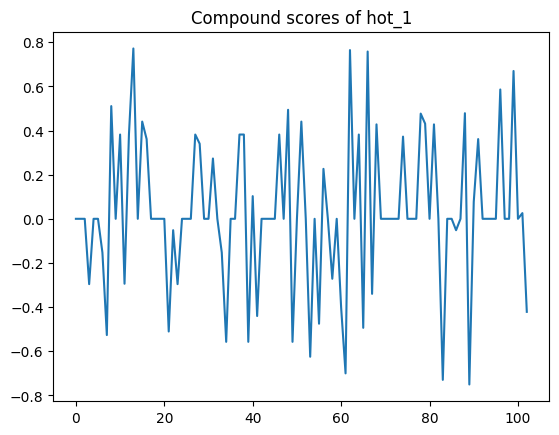

In [33]:
#plot the compound scores
df['compound'].plot(title="Compound scores of hot_1")

In [37]:
#count the number of non zero positive score
df[df['positive'] != 0].count()


text        26
negative    26
positive    26
neutral     26
compound    26
dtype: int64

In [45]:
len(hot_1)

103

In [49]:
import re
import pandas as pd

# Assuming hot_1 is a list of sentences
# Assuming df is the DataFrame with "Symbol" and "Name" columns

# Function to find matches using regular expressions
def find_matches(sentence, symbol_list):
    matches = []
    for symbol in symbol_list:
        if pd.notna(symbol):  # Skip NaN values in the symbol_list
            pattern = r"(?<!\$)" + re.escape(symbol) + r"(?!\w)"
            if re.search(pattern, sentence):
                matches.append(symbol)
    return matches

# List to store the results
results = []

# Convert "Symbol" column to a list of strings and remove NaN values
symbol_list = symbols['Symbol'].astype(str).tolist()

# Iterate through each sentence in hot_1
for sentence in hot_1:
    # Find matches for each sentence
    matches = find_matches(sentence, symbol_list)
    # If matches found, store the index and symbol; otherwise, store "S&P"
    if matches:
        results.append( matches)
    else:
        results.append( "S&P")

# Create a new DataFrame to store the results
result_df = pd.DataFrame(results, columns=[ "Matched_Symbols"])

# Print the result DataFrame
print(result_df)


    Matched_Symbols
0               S&P
1               S&P
2      [E, GME, ME]
3               S&P
4               S&P
..              ...
98              S&P
99         [EAT, T]
100         [C, RC]
101             S&P
102          [S, U]

[103 rows x 1 columns]


In [50]:
#add the matched_symbol column to the vader dataframe  
vader['matched_symbol'] = result_df['Matched_Symbols']
vader.tail()

,text,negative,positive,neutral,compound,matched_symbol
98,Got ‘em. Bulls on parade.,0.000,0.000,1.000,0.0000,S&P
99,Are you ready to party like it's 1929? Why jus...,0.163,0.285,0.552,0.6697,"[EAT, T]"
100,FRC moments after the money hits,0.000,0.000,1.000,0.0000,"[C, RC]"
101,Deal of the year 💸💸 already backed by Bank of ...,0.000,0.068,0.932,0.0258,S&P
102,Update: High Probability Recession Hits U.S. i...,0.259,0.000,0.741,-0.4215,"[S, U]"


In [67]:
#print all matched_symbols which is "S&P"
vader[vader['matched_symbol'] != 'S&P']


,text,negative,positive,neutral,compound,matched_symbol
2,Eggon says “GME go up” after earnings. ⬆️,0.000,0.000,1.000,0.0000,"[E, GME, ME]"
9,#DWAC and Trump Media Being investigated for M...,0.000,0.000,1.000,0.0000,"[AC, C, DWAC]"
20,A simple calculation,0.000,0.000,1.000,0.0000,[A]
21,Day 3 of Photoshopping failing banks on their ...,0.202,0.000,0.798,-0.5106,"[D, ED]"
23,"Jim Cramer Emo Remix - I made a mistake (SVB, ...",0.122,0.061,0.816,-0.2960,[B]
25,Can’t make this sh*t up. Schwab CEO vs. The Bi...,0.000,0.000,1.000,0.0000,[O]
26,+1000% on 0DTE Overnight You Fucking Nerds!,0.000,0.000,1.000,0.0000,"[DTE, E]"
28,"0DTE Gains Part 3: $150,000+",0.000,0.375,0.625,0.3400,"[DTE, E]"
30,Why SVB is just the beginning: Part II Eurodol...,0.000,0.000,1.000,0.0000,[B]
31,YOLO,0.000,1.000,0.000,0.2732,"[O, OLO]"


In [64]:
#number of enteries in vader
len(vader)


103

# GPT Price Prediction


In [280]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Read CSV File
file_path = 'price_data/S_P.csv'
data = pd.read_csv(file_path)
data['Date'] = pd.to_datetime(data['Date'])

# Scale All Columns Except Date
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.drop('Date', axis=1))

# Create Sequences
sequence_length = 60
X, y = [], []
for i in range(len(scaled_data) - sequence_length - 1):
    X.append(scaled_data[i : i + sequence_length])
    y.append(scaled_data[i + sequence_length, 3]) # 3 is the index of the 'Close' column
X, y = np.array(X), np.array(y)

# Split Data
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile and Train Model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Evaluate Loss
loss = model.evaluate(X_test, y_test, verbose=0)
print("Loss on Test Data:", loss)


2023-08-04 14:37:43.114995: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2023-08-04 14:37:43.117111: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-08-04 14:37:43.117316: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-08-04 14:37:43.118373: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-04 14:37:43.118872: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-08-04 14:37:46.022571: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-04 14:37:46.327474: I te

Loss on Test Data: 0.002647206885740161


In [282]:
#predict with the model
y_pred = model.predict(X_test)


2023-08-04 15:39:00.039081: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-04 15:39:00.418354: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-04 15:39:00.586171: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 47ms/step


In [285]:
# Create a dummy array with the same shape as the scaled_data, filled with zeros
dummy_array = np.zeros((y_pred.shape[0], scaled_data.shape[1]))

# Place the predicted scaled closing prices into the 'Close' column index (3 in this case)
dummy_array[:, 3] = y_pred.squeeze()

# Inverse scaling to get the original closing prices
y_pred_original = scaler.inverse_transform(dummy_array)[:, 3]

# Calculating the predicted returns as a percentage change between consecutive days
predicted_returns = [100 * (y_pred_original[i + 1] - y_pred_original[i]) / y_pred_original[i] for i in range(len(y_pred_original) - 1)]

# Displaying the predicted returns
print("Predicted Returns:", predicted_returns)


Predicted Returns: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [292]:
import pandas as pd

# Read CSV File
file_path = 'price_data/TSLA.csv'
data_tsla = pd.read_csv(file_path)

# Calculate the daily returns based on the "Close" column
data_tsla['Returns %'] = data_tsla['Close'].pct_change() * 100

# Displaying the calculated returns
print("Calculated Returns:", data_tsla['Returns %'].tolist())


Calculated Returns: [nan, 2.265568716125621, 0.40230228534861023, -6.63030068235908, 0.7819434052879659, -2.4412625864385085, 3.890581776676605, -2.6249292544206493, 4.675014362841368, 3.096359891583922, -0.8912075793144236, -0.8372333511224461, -0.37062197211366055, -2.0481852686155544, -2.2764022407583906, 2.25584954757323, 0.2170125887066332, -0.3455684406709514, -2.6953121859416895, -1.135058160727187, -2.49982267189629, -0.7526203685978228, 0.5623955563764049, -2.507581222110289, 1.5580556255471167, 3.381677109982606, 1.959815762903916, 3.602289482946186, 1.581694096302666, -4.037188096320543, 3.587437200418364, 0.3767273730617582, -0.13168523341049454, 1.8856110452001085, -0.11000625419275156, -2.5685948599634356, -4.059172855911775, -4.594757245188685, 0.24698479153155706, 2.510775852537339, 1.7212112374233701, -6.810050474193585, -1.1036096899372572, -8.614516909902203, 2.9042940273044104, -3.4597517632881436, -1.112907563204113, -6.324275500689214, -0.04931214719139376, -2.897

In [293]:
#add the returns to the data_tsla column
data_tsla.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Returns %
0,2022-08-02,294.003326,307.833344,292.666656,300.586670,300.586670,95577600,NaN
1,2022-08-03,305.000000,309.549988,301.149994,307.396667,307.396667,80091000,2.265569
2,2022-08-04,311.000000,313.606659,305.000000,308.633331,308.633331,72256200,0.402302
3,2022-08-05,302.670013,304.606659,285.543335,288.170013,288.170013,113172900,-6.630301
4,2022-08-08,295.000000,305.200012,289.086670,290.423340,290.423340,98994000,0.781943


In [294]:
#write data_tsla to TSLA.csv
data_tsla.to_csv('price_data/TSLA.csv', index=False)


# CHAT GPT - TOKEN/PRICE CAlCULATION